In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, IndexToString, RFormula,VectorSlicer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline, Model
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
spark = SparkSession.builder.appName('logregconsult').getOrCreate()

In [3]:
# File location and type
file_location = "COVID_confirmed_cases.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

data = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option('nanValue', ' ')\
  .option('nullValue', ' ')\
  .load(file_location)

# Pre-processing

In [4]:
df = data.toPandas()

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,08-01-20,08-02-20,08-03-20
0,None,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747
1,None,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620
2,None,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972
3,None,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,897,907,907,918,922,925,925,925,937
4,None,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,916,932,950,1000,1078,1109,1148,1164,1199,1280


In [6]:
df['Total'] = df.iloc[:,4:].sum(axis=1)

In [7]:
df[['Country/Region','Total']].sort_values('Total',ascending=False).head(3)

,Country/Region,Total
225,US,256188640
28,Brazil,108024882
131,India,52737993


In [8]:
df_us = df[df['Country/Region']=='US']
df_brazil = df[df['Country/Region']=='Brazil']
df_india = df[df['Country/Region']=='India']

In [9]:
x = df_us[list(df_us)[4:]]

arr_us_x = []
arr_us_y = []
week = 1
for i in range(0,len(list(x)),7):
#     print(i)
    arr_us_y.append(x.iloc[:,i:i+7].sum(axis=1).values[0])
    arr_us_x.append(week)
    week = week + 1 

In [10]:
x = df_india[list(df_india)[4:]]

arr_india_x = []
arr_india_y = []
week = 1
for i in range(0,len(list(x)),7):
#     print(i)
    arr_india_y.append(x.iloc[:,i:i+7].sum(axis=1).values[0])
    arr_india_x.append(week)
    week = week + 1 

In [11]:
x = df_brazil[list(df_brazil)[4:]]

arr_brazil_x = []
arr_brazil_y = []
week = 1
for i in range(0,len(list(x)),7):
#     print(i)
    arr_brazil_y.append(x.iloc[:,i:i+7].sum(axis=1).values[0])
    arr_brazil_x.append(week)
    week = week + 1 

In [12]:
import pandas as pd

In [13]:
df_us = pd.DataFrame({'X':arr_us_x,'y':arr_us_y})
df_brazil = pd.DataFrame({'X':arr_brazil_x,'y':arr_brazil_y})
df_india = pd.DataFrame({'X':arr_india_x,'y':arr_india_y})

In [14]:
df_us.to_csv('df_us.csv',index=False)
df_brazil.to_csv('df_brazil.csv',index=False)
df_india.to_csv('df_india.csv',index=False)

# File location and type
file_location = "df_us.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df_us = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option('nanValue', ' ')\
  .option('nullValue', ' ')\
  .load(file_location)


# File location and type
file_location = "df_brazil.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df_brazil = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option('nanValue', ' ')\
  .option('nullValue', ' ')\
  .load(file_location)



# File location and type
file_location = "df_india.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df_india = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option('nanValue', ' ')\
  .option('nullValue', ' ')\
  .load(file_location)

In [15]:
df_brazil.show()

+---+-------+
|  X|      y|
+---+-------+
|  1|      0|
|  2|      0|
|  3|      0|
|  4|      0|
|  5|      0|
|  6|     11|
|  7|    110|
|  8|   1075|
|  9|   8524|
| 10|  27412|
| 11|  71621|
| 12| 145511|
| 13| 251561|
| 14| 412941|
| 15| 682075|
| 16|1075846|
| 17|1615437|
| 18|2409285|
| 19|3410344|
| 20|4656247|
+---+-------+
only showing top 20 rows



# regression

- df_brazil

In [16]:
from pyspark.ml.feature import VectorAssembler

In [17]:
vectorAssembler = VectorAssembler(inputCols = ['X'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(df_brazil)
vhouse_df = vhouse_df.select(['features', 'y'])
# vhouse_df.show(3)

In [18]:
vhouse_df.show(10)

+--------+-----+
|features|    y|
+--------+-----+
|   [1.0]|    0|
|   [2.0]|    0|
|   [3.0]|    0|
|   [4.0]|    0|
|   [5.0]|    0|
|   [6.0]|   11|
|   [7.0]|  110|
|   [8.0]| 1075|
|   [9.0]| 8524|
|  [10.0]|27412|
+--------+-----+
only showing top 10 rows



In [19]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [20]:
train_df.show(10)

+--------+-------+
|features|      y|
+--------+-------+
|   [1.0]|      0|
|   [2.0]|      0|
|   [4.0]|      0|
|   [5.0]|      0|
|   [6.0]|     11|
|   [9.0]|   8524|
|  [12.0]| 145511|
|  [14.0]| 412941|
|  [16.0]|1075846|
|  [18.0]|2409285|
+--------+-------+
only showing top 10 rows



In [21]:
test_df.show(10)

+--------+-------+
|features|      y|
+--------+-------+
|   [3.0]|      0|
|   [7.0]|    110|
|   [8.0]|   1075|
|  [10.0]|  27412|
|  [11.0]|  71621|
|  [13.0]| 251561|
|  [15.0]| 682075|
|  [17.0]|1615437|
|  [20.0]|4656247|
|  [23.0]|9119765|
+--------+-------+
only showing top 10 rows



In [22]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='y')
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [549048.1223548132]
Intercept: -3750480.7984089116


In [23]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 2964007.901008
r2: 0.716493


In [24]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data =",test_result.rootMeanSquaredError)
print("R Squared (R2) on test data = {}".format(test_result.r2))
print('ExplainedVariance: ',test_result.explainedVariance)

Root Mean Squared Error (RMSE) on test data = 32531692.811668333
R Squared (R2) on test data = 0.07325610663281235
ExplainedVariance:  83099393477363.75


In [25]:
# lr_predictions = lr_model.transform(test_df)
# lr_predictions.select("prediction","y","features").show(5)
# from pyspark.ml.evaluation import RegressionEvaluator
# lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
#                  labelCol="y",metricName="r2")
# print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

# df_us

In [26]:
vectorAssembler = VectorAssembler(inputCols = ['X'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(df_us)
vhouse_df = vhouse_df.select(['features', 'y'])
# vhouse_df.show(3)

splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='y')
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

print('-------------------')

trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

print('-------------------')

test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data =",test_result.rootMeanSquaredError)
print("R Squared (R2) on test data = {}".format(test_result.r2))
print('ExplainedVariance: ',test_result.explainedVariance)

Coefficients: [4220584.858333715]
Intercept: -32930525.99954197
-------------------
RMSE: 53782329.287489
r2: 0.293280
-------------------
Root Mean Squared Error (RMSE) on test data = 35010114.50251405
R Squared (R2) on test data = -13.46967194798599
ExplainedVariance:  1655704429100781.5


# df_india

In [27]:
vectorAssembler = VectorAssembler(inputCols = ['X'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(df_india)
vhouse_df = vhouse_df.select(['features', 'y'])
# vhouse_df.show(3)

splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='y')
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

print('-------------------')

trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

print('-------------------')

test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data=",test_result.rootMeanSquaredError)
print("R Squared (R2) on test data = {}".format(test_result.r2))
print('ExplainedVariance: ',test_result.explainedVariance)

Coefficients: [806173.7651311178]
Intercept: -6233195.509386638
-------------------
RMSE: 12255378.121660
r2: 0.265843
-------------------
Root Mean Squared Error (RMSE) on test data= 6018521.305655515
R Squared (R2) on test data = -35.75754701202717
ExplainedVariance:  43177745247849.33


# highest variance is for df_us

In [28]:
df_us.show()

+---+--------+
|  X|       y|
+---+--------+
|  1|      21|
|  2|      55|
|  3|      78|
|  4|      90|
|  5|     101|
|  6|     227|
|  7|    2518|
|  8|   21166|
|  9|  200101|
| 10|  867127|
| 11| 2147841|
| 12| 3667253|
| 13| 5088988|
| 14| 6532795|
| 15| 7912526|
| 16| 9160041|
| 17|10286375|
| 18|11393530|
| 19|12424660|
| 20|13452628|
+---+--------+
only showing top 20 rows



In [29]:
vectorAssembler = VectorAssembler(inputCols = ['y'], outputCol = 'features')
df_kmeans = vectorAssembler.transform(df_us)
df_kmeans = df_kmeans.select(['X','features'])

In [30]:
df_kmeans.show()

+---+-------------+
|  X|     features|
+---+-------------+
|  1|       [21.0]|
|  2|       [55.0]|
|  3|       [78.0]|
|  4|       [90.0]|
|  5|      [101.0]|
|  6|      [227.0]|
|  7|     [2518.0]|
|  8|    [21166.0]|
|  9|   [200101.0]|
| 10|   [867127.0]|
| 11|  [2147841.0]|
| 12|  [3667253.0]|
| 13|  [5088988.0]|
| 14|  [6532795.0]|
| 15|  [7912526.0]|
| 16|  [9160041.0]|
| 17|[1.0286375E7]|
| 18| [1.139353E7]|
| 19| [1.242466E7]|
| 20|[1.3452628E7]|
+---+-------------+
only showing top 20 rows



In [31]:
import numpy as np
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()

# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
    predictions = model.transform(df_kmeans)
    silhouette = evaluator.evaluate(predictions)
    cost[k] = silhouette # requires Spark 2.0 or later

Text(0, 0.5, 'cost')

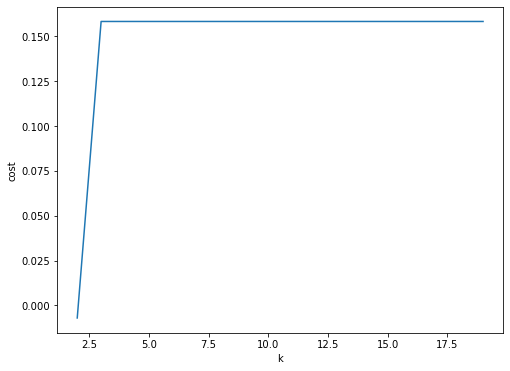

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

# higher the better i.e k = 3

In [33]:
k = 3
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[17554664.]
[2.83675048e+08]
[2225058.]


In [34]:
transformed = model.transform(df_kmeans).select('X', 'prediction')
# rows = transformed.collect()
# print(rows[:3])

In [35]:
transformed.show(df_us.count())

+---+----------+
|  X|prediction|
+---+----------+
|  1|         2|
|  2|         2|
|  3|         2|
|  4|         2|
|  5|         2|
|  6|         2|
|  7|         2|
|  8|         2|
|  9|         2|
| 10|         2|
| 11|         2|
| 12|         2|
| 13|         2|
| 14|         2|
| 15|         2|
| 16|         2|
| 17|         0|
| 18|         0|
| 19|         0|
| 20|         0|
| 21|         0|
| 22|         0|
| 23|         0|
| 24|         0|
| 25|         0|
| 26|         0|
| 27|         0|
| 28|         1|
+---+----------+



In [36]:
df_pred = transformed.join(df_us, 'X')
df_pred.show(df_us.count())

+---+----------+---------+
|  X|prediction|        y|
+---+----------+---------+
|  1|         2|       21|
|  2|         2|       55|
|  3|         2|       78|
|  4|         2|       90|
|  5|         2|      101|
|  6|         2|      227|
|  7|         2|     2518|
|  8|         2|    21166|
|  9|         2|   200101|
| 10|         2|   867127|
| 11|         2|  2147841|
| 12|         2|  3667253|
| 13|         2|  5088988|
| 14|         2|  6532795|
| 15|         2|  7912526|
| 16|         2|  9160041|
| 17|         0| 10286375|
| 18|         0| 11393530|
| 19|         0| 12424660|
| 20|         0| 13452628|
| 21|         0| 14494013|
| 22|         0| 15773857|
| 23|         0| 17559484|
| 24|         0| 19889538|
| 25|         0| 22704980|
| 26|         0| 25941335|
| 27|         0| 29180904|
| 28|         1|283675048|
+---+----------+---------+



In [37]:
df_pred = df_pred.toPandas()

In [38]:
df_pred

,X,prediction,y
0,1,2,21
1,2,2,55
2,3,2,78
3,4,2,90
4,5,2,101
5,6,2,227
6,7,2,2518
7,8,2,21166
8,9,2,200101
9,10,2,867127


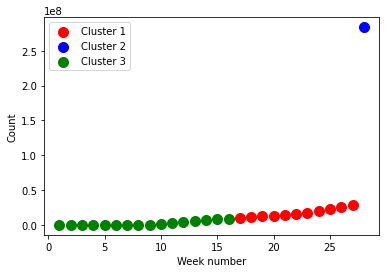

In [39]:
x = df_pred[df_pred['prediction']==0]['X'].values
y = df_pred[df_pred['prediction']==0]['y'].values

plt.scatter(x,y, s = 100, c = 'red', label = 'Cluster 1')

x = df_pred[df_pred['prediction']==1]['X'].values
y = df_pred[df_pred['prediction']==1]['y'].values

plt.scatter(x,y, s = 100, c = 'blue', label = 'Cluster 2')


x = df_pred[df_pred['prediction']==2]['X'].values
y = df_pred[df_pred['prediction']==2]['y'].values

plt.scatter(x,y, s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Week number')
plt.ylabel('Count')
plt.legend()
plt.show()